## Logistic Regression with NumPy 
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rmenegaux/Intro-to-Neural-Nets-AIMS-2025/blob/main/lecture1_linear_regression_numpy.ipynb)


### Problem definition: Classification with Logistic Regression

Logistic regression is a linear classification algorithm that predicts the probability of a binary outcome. Given an input feature vector **x**, the model computes:

$$
z = w^T x
$$

where $w$ is the weight vector. The bias term $b$ has been omitted for simplicity, but can be accounted for by concatenating a 1 to $x$.

Instead of using this value directly for classification, we apply the **sigmoid function**:
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

This maps the output to a probability between 0 and 1: 
$$\sigma(z) = \mathbb{P}[y=1 | x]$$
The predicted class can then be determined by thresholding:
$$
\hat{y} =
\begin{cases}
1, & \text{if } \sigma(z) \geq 0.5 \\
0, & \text{otherwise}
\end{cases}
$$

To train the model, we minimize the **binary cross-entropy loss**:

$$
L = - \frac{1}{N} \sum_{i=1}^{N} \left( y_i \log \sigma(z_i) + (1 - y_i) \log (1 - \sigma(z_i)) \right)
$$

where **y** is the true label and **ŷ** is the predicted probability.

Gradient descent is used to update **w** and **b** iteratively to minimize this loss.


### Question 1: Computing the gradients
Proceeding step by step:

- Compute the derivative of $z \to \log \sigma(z)$
- Compute the gradient w.r.t $w$ of $z(w) = w^T x$
- Using the chain rule, deduce the gradient of $w \to \log \sigma(z(w))$
- Deduce the gradient of $L$ w.r.t. $w$: $\nabla_w L$

### Question 2: Plot the sigmoid function

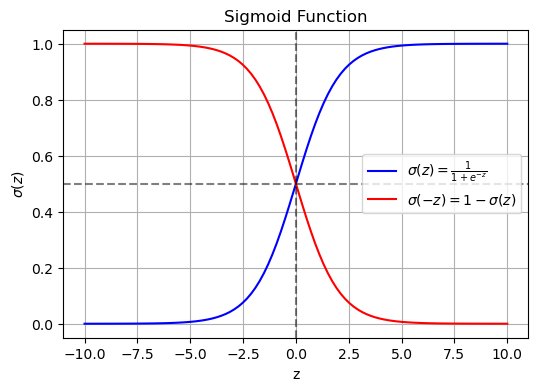

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define sigmoid function
def sigmoid(z):
    return ...

# Generate input values
z = np.linspace(-10, 10, 100)
complementary_sigmoid = sigmoid(-z)

# Plot sigmoid function
plt.figure(figsize=(6, 4))
plt.plot(z, sigmoid(z), label=r'$\sigma(z) = \frac{1}{1 + e^{-z}}$', color='b')
plt.plot(z, sigmoid(-z), label=r'$\sigma(-z) = 1 - \sigma(z)$', color='r')

plt.axvline(0, color='k', linestyle='--', alpha=0.5)
plt.axhline(0.5, color='k', linestyle='--', alpha=0.5)
plt.xlabel("z")
plt.ylabel(r"$\sigma(z)$")
plt.title("Sigmoid Function")
plt.legend()
plt.grid(True)
plt.show()

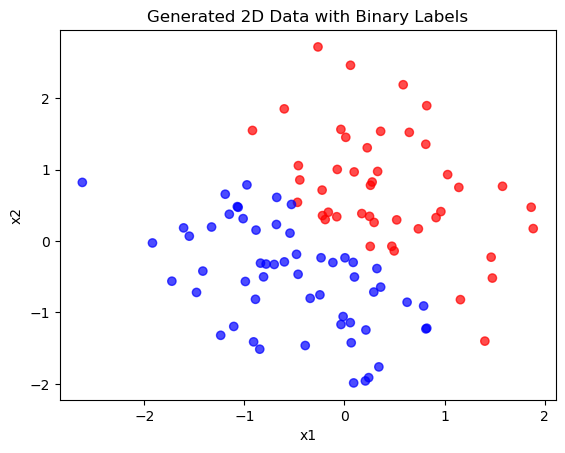

In [3]:
# Generate synthetic 2D classification data
np.random.seed(42)
x = np.random.randn(100, 2)
y = (x[:, 0] + x[:, 1] > 0).astype(int)  # Binary classification

# Plot data
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='bwr', alpha=0.7)
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Generated 2D Data with Binary Labels")
plt.show()

### Question 3: Gradient descent
Fill in the missing parts 

In [ ]:
def bce_loss(y_hat, y):
    '''
    Returns the binary cross-entropy (BCE) loss for predicted probabilities `y_hat` in [0,1]
    and ground-truth binary labels `y`
    '''
    return ...

def compute_logistic_gradients(x, y, w):
    '''
    Compute the gradients for logistic regression using Binary Cross-Entropy (BCE) loss.

    Arguments:
    x -- Input features, shape (N, d), where N is the number of samples and d is the number of features.
    y -- Binary labels (0 or 1), shape (N,).
    w -- Weight vector, shape (d,).

    Returns:
    grad_w -- Gradient of the BCE loss with respect to w, shape (d,).
    '''
    grad_w = ...
    return grad_w

Epoch 0: Loss=0.328
Epoch 10: Loss=0.309
Epoch 20: Loss=0.294
Epoch 30: Loss=0.281
Epoch 40: Loss=0.270
Epoch 50: Loss=0.261
Epoch 60: Loss=0.252
Epoch 70: Loss=0.245
Epoch 80: Loss=0.238
Epoch 90: Loss=0.232


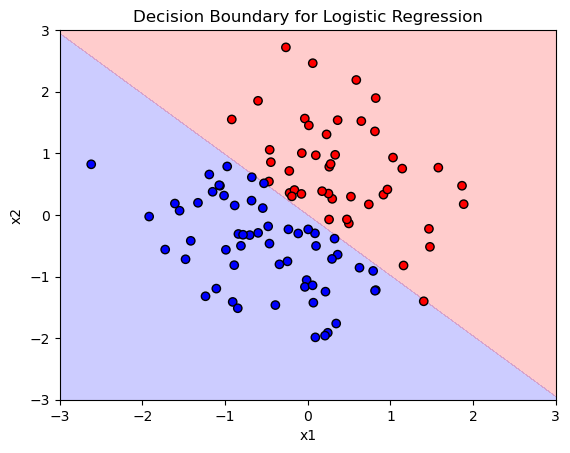

In [ ]:
# Randomly initialize the weights
w = ...
learning_rate = ...
num_epochs = ...

# Train using gradient descent
for epoch in range(num_epochs):
    # update step
    grad_w = compute_logistic_gradients(x, y, w)
    w = ...
    if epoch % 10 == 0:
        # Print the cross-entropy loss with our current predictions
        y_hat = ...
        loss = bce_loss(y_hat, y)
        print('Epoch {}: Loss={:.3f}'.format(epoch, loss))

# Plot decision boundary
xx, yy = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
grid = np.c_[xx.ravel(), yy.ravel()]
z = sigmoid(grid @ w).reshape(xx.shape)

plt.contourf(xx, yy, z, levels=[0, 0.5, 1], colors=['blue', 'red'], alpha=0.2)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='bwr', edgecolor='k')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Decision Boundary for Logistic Regression")
plt.show()